
# YOLOv8 — Detector de *Completos* desde 0 (Roboflow → Ultralytics)

Este notebook reproduce el pipeline de entrenamiento **desde cero** usando el **mismo dataset de Roboflow** y la **misma configuración base** con la que entrenaste anteriormente, pero sin exponer claves.


In [1]:

# (Opcional) Instalar dependencias si el entorno es nuevo
!pip install -U ultralytics roboflow==1.1.33
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121  # si necesitas CUDA específica


     ---------------------------------------- 1.1/1.1 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 75.6/75.6 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 158.6/158.6 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 23.5 MB/s eta 0:00:00
     ---------------------------------------- 66.8/66.8 kB 3.5 MB/s eta 0:00:00
     ------------------------------------- 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ---------------------------------------- 163.3/163.3 kB ? eta 0:00:00
     --------------------------------------- 38.8/38.8 MB 26.2 MB/s eta 0:00:00
     ---------------------------------------- 129.8/129.8 kB ? eta 0:00:00
     ---------------------------------------- 54.5/54.5 kB ? eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 37.0 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB ? 


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import os, sys, platform, json, shutil
from pathlib import Path
from ultralytics import YOLO
from roboflow import Roboflow
import torch

print("Python:", sys.version)
print("SO:", platform.platform())
print("CUDA disponible:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


Python: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
SO: Windows-10-10.0.26100-SP0
CUDA disponible: False


## 1) Descargar dataset desde Roboflow (formato YOLOv8)

In [3]:


API_KEY = "rfURipMTLdMTRCxLbwVz"
WORKSPACE = "anays"
PROJECT = "dataset-comida-chilena-8wtna" 
VERSION = 1
if not API_KEY:
    raise RuntimeError("Falta la variable de entorno ROBOFLOW_API_KEY. Define tu API Key: os.environ['ROBOFLOW_API_KEY'] = '...'.")

# Conectar a Roboflow y descargar dataset en formato YOLOv8
rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT)
version = project.version(VERSION)

dataset = version.download("yolov8")  # formato correcto para Ultralytics
DATA_DIR = dataset.location
DATA_YAML = os.path.join(DATA_DIR, "data.yaml")
print("DATA_DIR =", DATA_DIR)
print("DATA_YAML =", DATA_YAML)

assert os.path.exists(DATA_YAML), "No se encontró data.yaml tras la descarga."


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.214, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dataset-Comida-Chilena-1 in yolov8:: 100%|██████████| 950/950 [00:00<00:00, 1114.87it/s]

DATA_DIR = c:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\Dataset-Comida-Chilena-1
DATA_YAML = c:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\Dataset-Comida-Chilena-1\data.yaml


## 2) Hiperparámetros de entrenamiento

In [ ]:

# Hiperparámetros 
IMGSZ = 320
EPOCHS = 100
BATCH = 8
PROJECT = "detector_completos"
RUN_NAME = "rf_completos"
CLOSE_MOSAIC = 10
PATIENCE = 10

# Selección de dispositivo
DEVICE = 0 if torch.cuda.is_available() else 'cpu'

print({
    "imgsz": IMGSZ, "epochs": EPOCHS, "batch": BATCH,
    "project": PROJECT, "name": RUN_NAME,
    "close_mosaic": CLOSE_MOSAIC, "patience": PATIENCE,
    "device": "GPU" if DEVICE == 0 else "CPU"
})


{'imgsz': 320, 'epochs': 100, 'batch': 8, 'project': 'detector_completos', 'name': 'rf_completos', 'close_mosaic': 10, 'patience': 20, 'device': 'CPU'}


## 3) Inicializar modelo base y entrenar

In [6]:

# Usar YOLOv8n como base 
BASE_WEIGHTS = "yolov8n.pt"
model = YOLO(BASE_WEIGHTS)

# Entrenamiento
results = model.train(
    data=DATA_YAML,
    imgsz=IMGSZ,
    epochs=EPOCHS,
    batch=BATCH,
    device=DEVICE,
    project=PROJECT,
    name=RUN_NAME,
    close_mosaic=CLOSE_MOSAIC,
    patience=PATIENCE,
    plots=False
)

print("Entrenamiento finalizado.")


Ultralytics 8.3.214  Python-3.10.6 torch-2.9.0+cpu CPU (12th Gen Intel Core i5-12450H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\Dataset-Comida-Chilena-1\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rf_completos, nbs=64, nms=False, opset=None

## 4) Validación con los mejores pesos

In [7]:

# Ruta a los mejores pesos del run actual
BEST_PT = os.path.join(PROJECT, RUN_NAME, "weights", "best.pt")
print("BEST_PT =", BEST_PT)
assert os.path.exists(BEST_PT), "No se encontraron best.pt. Revisa el nombre del run."

best_model = YOLO(BEST_PT)
metrics = best_model.val(data=DATA_YAML, imgsz=IMGSZ, device=DEVICE)
print("Metrics:", metrics)


BEST_PT = detector_completos\rf_completos\weights\best.pt
Ultralytics 8.3.214  Python-3.10.6 torch-2.9.0+cpu CPU (12th Gen Intel Core i5-12450H)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 137.538.7 MB/s, size: 24.0 KB)
val: Scanning C:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\Dataset-Comida-Chilena-1\valid\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 40/40 40.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 3.0it/s 1.0s0.7s
                   all         40         64      0.924      0.984      0.982      0.718
Speed: 0.5ms preprocess, 18.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to C:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\runs\detect\val
Metrics: ultralytics.utils.metrics.DetMetrics object 

In [9]:
!pip install pandas

     --------------------------------------- 11.3/11.3 MB 27.3 MB/s eta 0:00:00
     ------------------------------------- 347.8/347.8 kB 21.1 MB/s eta 0:00:00
     ------------------------------------- 509.2/509.2 kB 31.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
%matplotlib inline


## 5) Gráficos


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


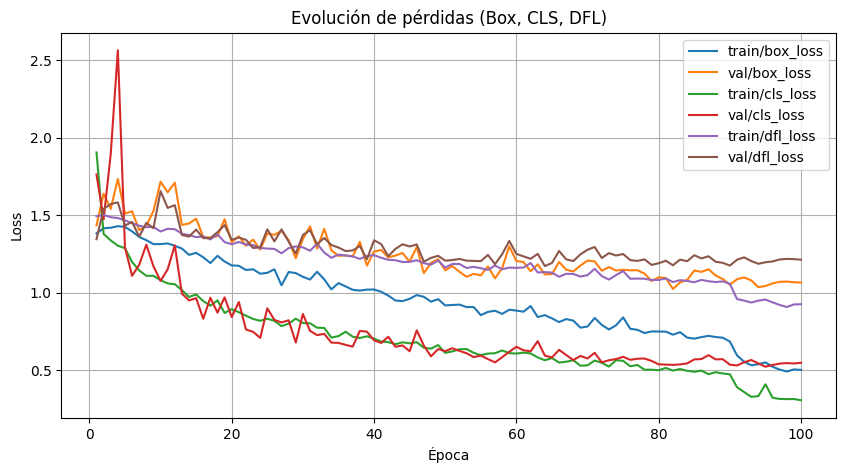

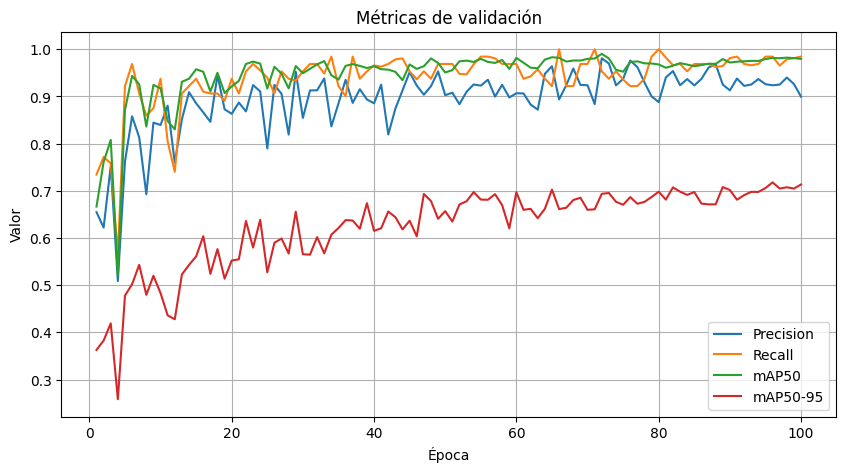

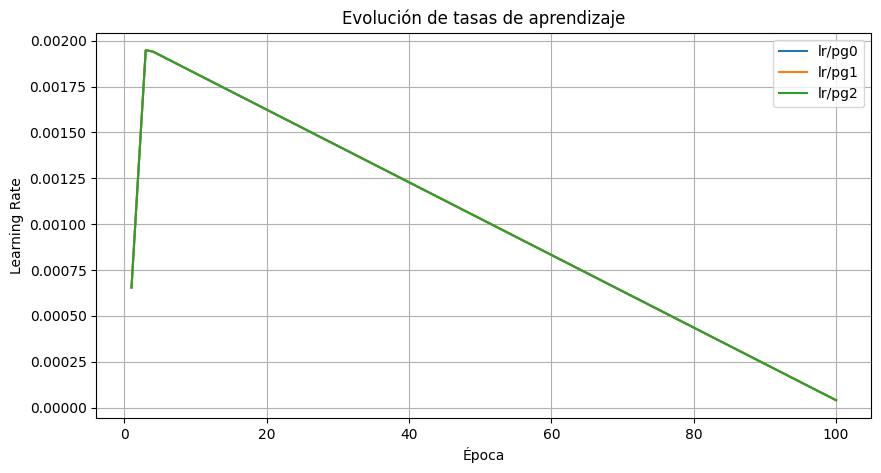

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"detector_completos\rf_completos\results.csv")
print(df.columns.tolist())

# -------------------
# 1) Curvas de pérdidas
# -------------------
plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["train/box_loss"], label="train/box_loss")
plt.plot(df["epoch"], df["val/box_loss"], label="val/box_loss")
plt.plot(df["epoch"], df["train/cls_loss"], label="train/cls_loss")
plt.plot(df["epoch"], df["val/cls_loss"], label="val/cls_loss")
plt.plot(df["epoch"], df["train/dfl_loss"], label="train/dfl_loss")
plt.plot(df["epoch"], df["val/dfl_loss"], label="val/dfl_loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolución de pérdidas (Box, CLS, DFL)")
plt.legend()
plt.grid()
plt.show()

# -------------------
# 2) Métricas principales (Precision, Recall, mAP)
# -------------------
plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.title("Métricas de validación")
plt.legend()
plt.grid()
plt.show()

# -------------------
# 3) Tasas de aprendizaje
# -------------------
plt.figure(figsize=(10,5))
plt.plot(df["epoch"], df["lr/pg0"], label="lr/pg0")
plt.plot(df["epoch"], df["lr/pg1"], label="lr/pg1")
plt.plot(df["epoch"], df["lr/pg2"], label="lr/pg2")
plt.xlabel("Época")
plt.ylabel("Learning Rate")
plt.title("Evolución de tasas de aprendizaje")
plt.legend()
plt.grid()
plt.show()



## 6) Prueba rápida de inferencia (imagen de ejemplo)


image 1/1 c:\Users\anays\OneDrive\Escritorio\SHEFU - ENTREGABLE VC\Completos\Detector completos\completos\completos.png: 192x320 2 Completoss, 103.2ms
Speed: 1.2ms preprocess, 103.2ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 320)
Recorte guardado como recorte.jpg


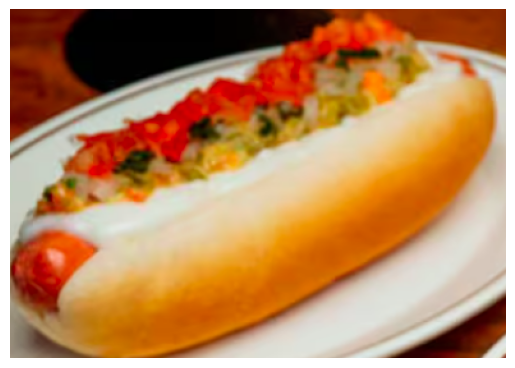

tensor(0.9254)
Recorte guardado como recorte.jpg


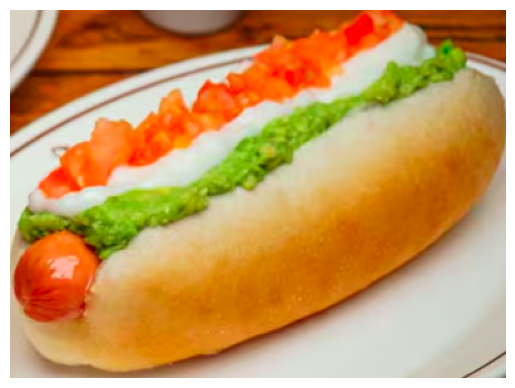

tensor(0.8937)


In [21]:
import cv2
import matplotlib.pyplot as plt

# Parámetros
imagen_path = "completos\completos.png"  # Ruta a tu imagen de prueba
conf_minima = 0.5
clase_objetivo = 0  # Cambia según el ID de la clase que quieres detectar

# Cargar modelo
model = YOLO(BEST_PT)

# Cargar imagen
img = cv2.imread(imagen_path)

# Inferencia
resultados = model.predict(imagen_path, conf=conf_minima)

# Recorrer detecciones
for r in resultados:
    for box in r.boxes:
        if int(box.cls[0]) == clase_objetivo and box.conf[0] >= conf_minima:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            recorte = img[y1:y2, x1:x2]

            # Guardar recorte
            cv2.imwrite("recorte.jpg", recorte)
            print("Recorte guardado como recorte.jpg")

            # Mostrar recorte en Jupyter/Colab
            recorte_rgb = cv2.cvtColor(recorte, cv2.COLOR_BGR2RGB)
            plt.imshow(recorte_rgb)
            plt.axis("off")
            plt.show()
            print(box.conf[0])